In [14]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [15]:
X = pd.read_csv('X_preprocessed_fillna_100features.csv', index_col=False)
X = X.drop(columns=['internalTaxonId'])
y = pd.read_csv('y_preprocessed_fillna.csv', index_col=False)
y = y[["redlistCategory"]]

print("X shape: ", X.shape, "y shape: ", y.shape)

X shape:  (53657, 100) y shape:  (53657, 1)


In [16]:
'''y = y.replace({
    0: "Least Concern",
    1: "Near Threatened",
    2: "Vulnerable",
    3: "Endangered",
    4: "Critically Endangered",
    5: "Extinct in the Wild",
    6: "Extinct",
})'''

'y = y.replace({\n    0: "Least Concern",\n    1: "Near Threatened",\n    2: "Vulnerable",\n    3: "Endangered",\n    4: "Critically Endangered",\n    5: "Extinct in the Wild",\n    6: "Extinct",\n})'

In [17]:
#y = pd.get_dummies(y.redlistCategory)
#y.head()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [19]:
y_test.head()

,redlistCategory
22425,0
8821,0
7625,2
35960,4
46618,0


In [20]:
#set random seed
tf.random.set_seed(42)
#create the model
model_12=tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(70,activation="relu"),
    tf.keras.layers.Dense(70,activation="relu"),
    tf.keras.layers.Dense(30,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(7,activation="softmax")
])
#compile the model
model_12.compile(
   #loss='categorical_crossentropy',
   loss=tf.keras.losses.SparseCategoricalCrossentropy(),
   optimizer=tf.keras.optimizers.Adam(),
   metrics="accuracy")
#create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 *10**(epoch/20) )
#fit the model
epoch_num = 14
fit_lr_history =model_12.fit(
   X_train,
   y_train,
   epochs=epoch_num,
   callbacks=[lr_scheduler],
   validation_data=(X_test,y_test),
   verbose=1)

Epoch 1/14
1124/1124 [==============================] - 5s 3ms/step - loss: 1.0677 - accuracy: 0.5737 - val_loss: 1.0072 - val_accuracy: 0.5965 - lr: 0.0010
Epoch 2/14
1124/1124 [==============================] - 3s 3ms/step - loss: 0.9722 - accuracy: 0.6117 - val_loss: 0.9747 - val_accuracy: 0.6088 - lr: 0.0011
Epoch 3/14
1124/1124 [==============================] - 3s 2ms/step - loss: 0.9474 - accuracy: 0.6245 - val_loss: 0.9674 - val_accuracy: 0.6161 - lr: 0.0013
Epoch 4/14
1124/1124 [==============================] - 3s 3ms/step - loss: 0.9331 - accuracy: 0.6283 - val_loss: 0.9672 - val_accuracy: 0.6140 - lr: 0.0014
Epoch 5/14
1124/1124 [==============================] - 3s 2ms/step - loss: 0.9235 - accuracy: 0.6329 - val_loss: 0.9654 - val_accuracy: 0.6192 - lr: 0.0016
Epoch 6/14
1124/1124 [==============================] - 3s 3ms/step - loss: 0.9149 - accuracy: 0.6367 - val_loss: 0.9601 - val_accuracy: 0.6202 - lr: 0.0018
Epoch 7/14
1124/1124 [==============================] - 3s

In [21]:
a = model_12.evaluate(X_test,y_test)

554/554 [==============================] - 1s 2ms/step - loss: 0.9946 - accuracy: 0.6054


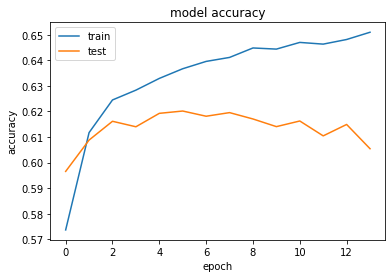

In [22]:
plt.plot(fit_lr_history.history['accuracy'])
plt.plot(fit_lr_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
y_pred = model_12.predict(X_test)
y_pred = [np.argmax(x) for x in y_pred]


554/554 [==============================] - 1s 1ms/step


Text(0.5, 1.0, 'Finding the ideal Learning Rate')

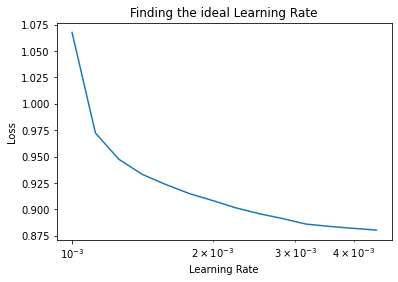

In [24]:
import matplotlib.pyplot as plt

lrs =1e-3 *(10**(tf.range(epoch_num)/20))
plt.semilogx(lrs,fit_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal Learning Rate")

[[7431   47  785  458   31    0    2]
 [ 387   33  419  315   16    0    0]
 [ 556   13 1416  902   47    0    1]
 [ 301   10 1067 1647  107    0    2]
 [ 155    5  398  912  184    0    0]
 [   5    0    2    1    4    0    0]
 [   9    0   11   11    8    0    9]]


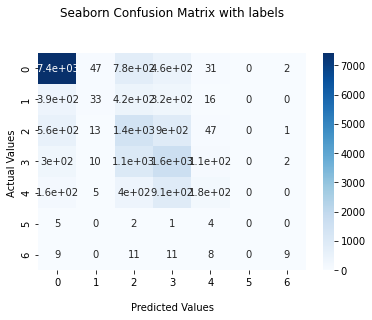

In [25]:
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)
#y_pred
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
#ax.xaxis.set_ticklabels(['False','True'])
#ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

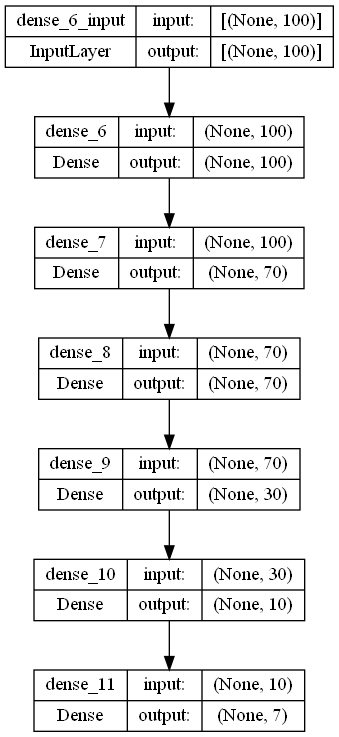

In [26]:
from tensorflow.keras.utils import plot_model
#see the inputs and outputs
plot_model(model_12,show_shapes=True)